In [19]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [20]:
def rk4(f, u0, t0, tf, h):
    # Inicializar arrays de tiempo y solución
    t = np.arange(t0, tf, h)
    u = np.zeros((len(t), len(u0)))
    u[0] = u0
    
    # Iterar con RK4
    for i in range(0, len(t) - 1):
        k1 = h * f(u[i], t[i])
        k2 = h * f(u[i] + k1/2, t[i] + h/2)
        k3 = h * f(u[i] + k2/2, t[i] + h/2)
        k4 = h * f(u[i] + k3, t[i] + h)
        
        u[i + 1] = u[i] + (k1 + 2*k2 + 2*k3 + k4) / 6
    
    return t, u

# a

In [21]:
def movPlanet(u, t, gm):
    x, y, vx, vy = u
    r = np.sqrt(x**2 + y**2)
    ax = -gm * x / r**3
    ay = -gm * y / r**3
    return np.array([vx, vy, ax, ay])

## Para la tierra

In [22]:
gm = 4 * np.pi**2  # AU^3/year^2
a = 1.0  # AU
epsilon = 0.0167
x0 = a * (1 - epsilon)
y0 = 0
vx0 = 0
vy0 = np.sqrt(gm * (1 + epsilon) / (a * (1 - epsilon)))

In [23]:
u0 = np.array([x0, y0, vx0, vy0])

In [24]:
t, u = rk4(lambda u, t: movPlanet(u, t, gm), u0, 0, 1, 0.001)

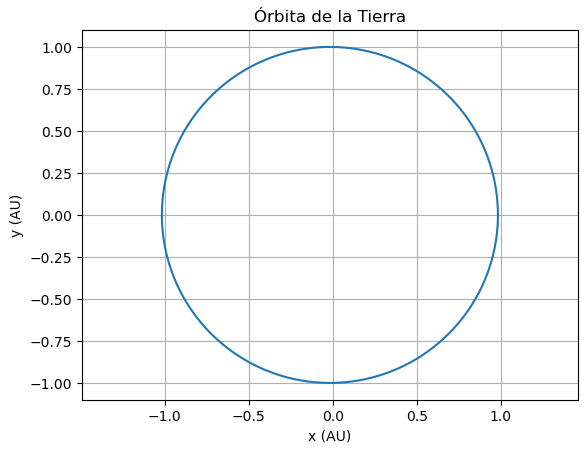

In [25]:
plt.plot(u[:, 0], u[:, 1])
plt.xlabel('x (AU)')
plt.ylabel('y (AU)')
plt.title('Órbita de la Tierra')
plt.grid(True)
plt.axis('equal')
plt.show()

La ecuación  $\frac{d\vec{u}}{dt} = \vec{F}$ representa una relación dinámica donde  $\vec{u}$ es la velocidad y $\vec{F}$ es la fuerza. Analicemos las dimensiones de $\vec{u}$ y $\vec{F}$ en esta ecuación:

1. **Dimensiones de $\vec{u}$ (velocidad):**
   La velocidad $\vec{u}$ es una cantidad vectorial que tiene dimensiones de longitud dividida por tiempo ( $L T^{-1}$ ). Por ejemplo, en unidades del Sistema Internacional (SI), la velocidad se mide en metros por segundo (m/s).

2. **Dimensiones de $\vec{F}$ (fuerza):**
   La fuerza $\vec{F}$ es también una cantidad vectorial y tiene dimensiones de masa multiplicada por longitud dividida por el cuadrado del tiempo ( $M L T^{-2}$ ). En unidades del SI, la fuerza se mide en newtons (N), donde $1 \, \text{N} = 1 \, \text{kg} \cdot \text{m} / \text{s}^2$.

En el contexto de la ecuación diferencial $\frac{d\vec{u}}{dt} = \vec{F}$, podemos interpretar esto de la siguiente manera:
- $\vec{u}$ representa la velocidad del planeta, indicando cómo cambia su posición en el espacio con el tiempo.
- $\vec{F}$ representa la fuerza gravitacional que actúa sobre el planeta, ejercida por el sol en este caso. Esta fuerza es responsable de la aceleración (cambio en la velocidad) del planeta.

Dado que $\frac{d\vec{u}}{dt}$ es una aceleración (cambio de velocidad en el tiempo), tiene las mismas dimensiones que $\vec{F}$, es decir, $M L T^{-2}$, asegurando la coherencia dimensional en ambos lados de la ecuación.


# b

## para todo el sistema solar

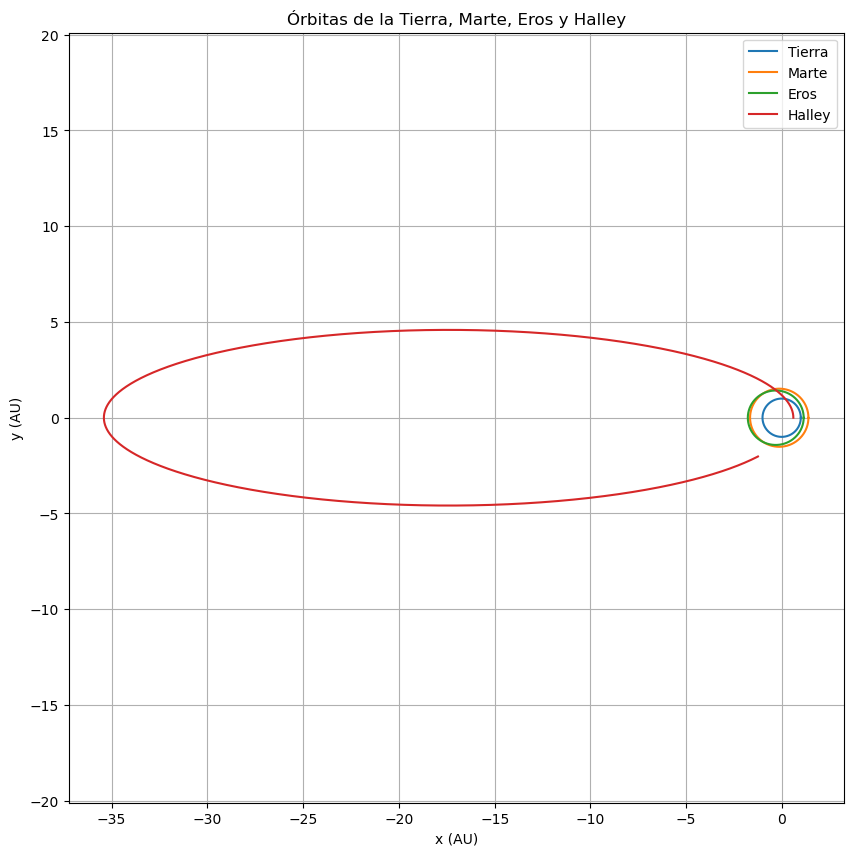

In [26]:
orbit_params = {
    "Tierra": {"T": 1.0, "a": 1.0, "epsilon": 0.0167},
    "Marte": {"T": 1.88, "a": 1.5237, "epsilon": 0.0934},
    "Eros": {"T": 1.761, "a": 1.4583, "epsilon": 0.2229},
    "Halley": {"T": 76.0, "a": 18.0, "epsilon": 0.967}
}

# Definir función para calcular la órbita
def calculate_orbit(a, epsilon, T, h=0.001):
    x0 = a * (1 - epsilon)
    y0 = 0
    vx0 = 0
    vy0 = np.sqrt(gm * (1 + epsilon) / (a * (1 - epsilon)))
    u0 = np.array([x0, y0, vx0, vy0])
    t, u = rk4(lambda u, t: movPlanet(u, t, gm), u0, 0, T, h)
    return u[:, 0], u[:, 1]

# Graficar las órbitas
plt.figure(figsize=(10, 10))
for name, params in orbit_params.items():
    x, y = calculate_orbit(params["a"], params["epsilon"], params["T"])
    plt.plot(x, y, label=name)

plt.xlabel('x (AU)')
plt.ylabel('y (AU)')
plt.title('Órbitas de la Tierra, Marte, Eros y Halley')
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.show()

# c

In [27]:
def orbitas(u,t):
    return movPlanet(u,t,gm)

In [28]:
def calcular_energia_mecanica(u, G, M):
    # Extraer la posición (x, y) y la velocidad (vx, vy) de u
    x, y, vx, vy = u[:,0], u[:,1], u[:,2], u[:,3]
    
    # Calcular la magnitud de la velocidad y la distancia al origen
    v = np.sqrt(vx**2 + vy**2)
    r = np.sqrt(x**2 + y**2)
    
    # Calcular la energía cinética por unidad de masa (K) y la energía potencial por unidad de masa (U)
    K = 0.5 * v**2
    U = -G * M / r
    
    # Calcular la energía mecánica por unidad de masa (E)
    E = K + U
    
    return E

In [29]:
# Condiciones iniciales
a = 1   #Semi-eje mayor
ux0 = a * (1 - 0.0167)  #posición inicial en x
gm = 4 * np.pi**2 
e = 0.0167  #excentricidad de la órbita de la Tierra
vy0 = math.sqrt((gm * (1 + e))/(a * (1 - e)))       #velocidad inicial en y
uy0 = 0.0              #posición inicial y
vx0 = 0.0              #velocidad  inicial x
t0 = 0.0               # tiempo inicial
tf = 1                 # tiempo final
h = 0.001              # tamaño del pasos

In [30]:
u0 = np.array([ ux0 ,uy0, vx0, vy0])  # posición inicial y velocidad inicial
t,u = rk4(orbitas, u0 , t0 , tf , h)

In [31]:
# Calcular la energía mecánica por unidad de masa
G = 6.67430e-11  # Constante gravitacional en m^3 kg^-1 s^-2
M = 5.972e24    # Masa de la Tierra en kg
E = calcular_energia_mecanica(u, G, M)

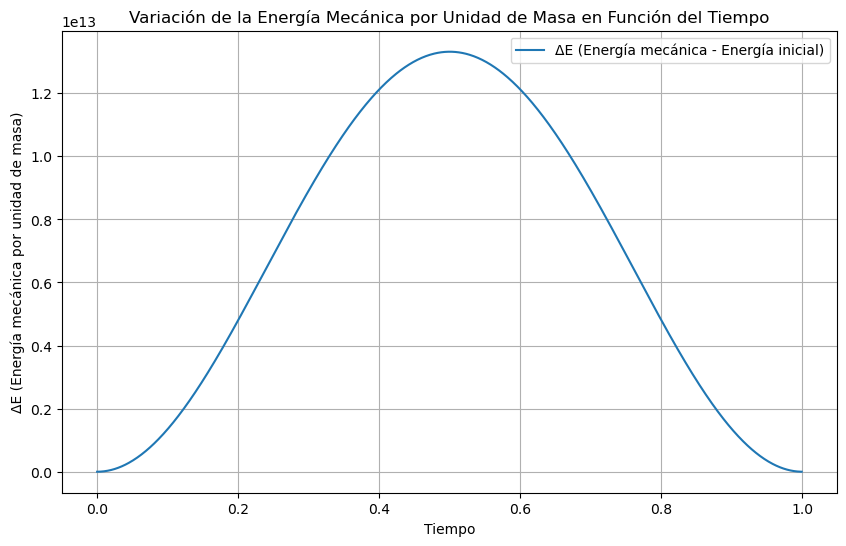

In [32]:
# Calcular ΔE como la diferencia entre E(t) y E(0)
delta_E = E - E[0]

# Graficar ΔE respecto al tiempo
plt.figure(figsize=(10, 6))
plt.plot(t, delta_E, label='ΔE (Energía mecánica - Energía inicial)')
plt.xlabel('Tiempo')
plt.ylabel('ΔE (Energía mecánica por unidad de masa)')
plt.title('Variación de la Energía Mecánica por Unidad de Masa en Función del Tiempo')
plt.legend()
plt.grid(True)
plt.show()

La conservación de la energía es un principio fundamental en física que establece que la energía total de un sistema aislado permanece constante con el tiempo. Al observar la gráfica proporcionada, que muestra ΔE (la variación de la energía mecánica por unidad de masa) en función del tiempo, se espera que, para un sistema conservativo, esta cantidad sea cero o cercana a cero en todo momento.

Sin embargo, la gráfica muestra una variación notable de ΔE, lo que sugiere que la energía mecánica del sistema no se conserva durante el intervalo de tiempo simulado. 

# d

El paso de tiempo Δt ideal es aquel que es lo suficientemente pequeño para capturar con precisión la dinámica física del sistema sin introducir errores numéricos significativos, pero lo suficientemente grande para no incurrir en costos computacionales innecesarios. A menudo es útil comenzar con un Δt conservadoramente pequeño y aumentarlo gradualmente hasta que la solución comience a diverger o perder precisión significativa. También es recomendable realizar un análisis de sensibilidad para entender cómo la solución depende de la elección de Δt.

# e

In [33]:
def f(u, t, GM):
    x1, y1, vx1, vy1, x2, y2, vx2, vy2 = u
    
    # Calcular distancias al sol
    r1 = np.sqrt(x1**2 + y1**2)
    r2 = np.sqrt(x2**2 + y2**2)
    
    # Calcular componentes de aceleración debido a la gravedad del sol
    ax1 = -GM * x1 / r1**3
    ay1 = -GM * y1 / r1**3
    ax2 = -GM * x2 / r2**3
    ay2 = -GM * y2 / r2**3
    
    # Devolver derivadas de los componentes del vector de estado
    return np.array([vx1, vy1, ax1, ay1, vx2, vy2, ax2, ay2])

# f

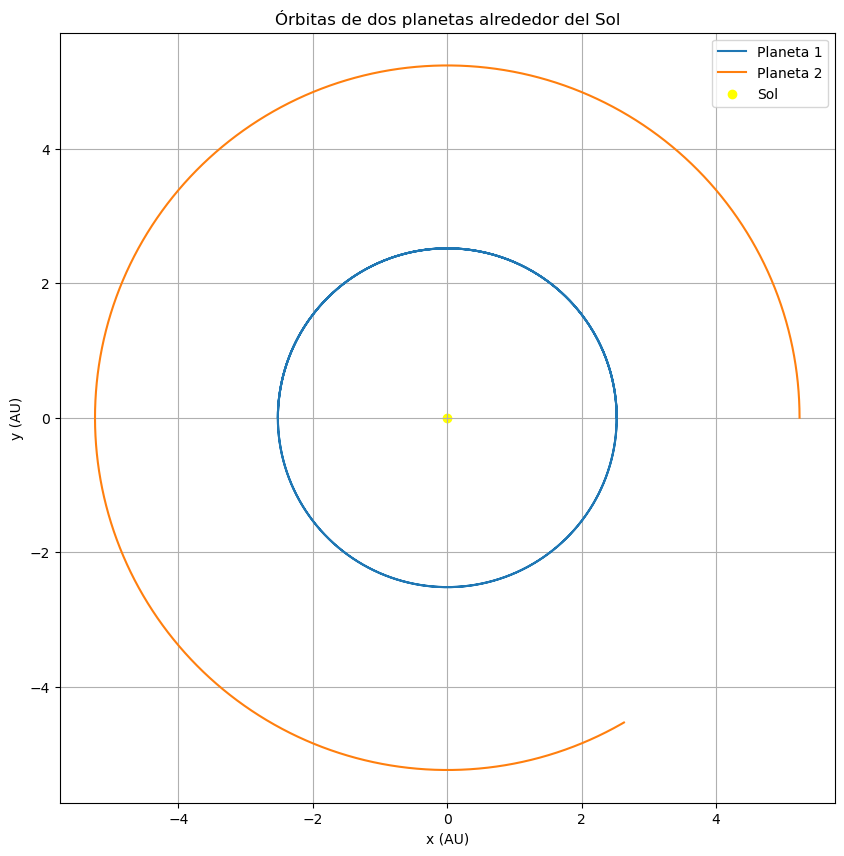

In [34]:
gm = 4 * np.pi**2

# Condiciones iniciales
u0 = [2.52, 0, 0, 3.958034705745753, 5.24, 0, 0, 2.7448222458179172]

T = 10  # años, suficiente para ver varias órbitas
h = 0.001  # paso de tiempo en años

t, u = rk4(lambda u, t: f(u, t, gm), u0, 0, T, h)

x1, y1 = u[:,0], u[:,1]
x2, y2 = u[:,4], u[:,5]

plt.figure(figsize=(10, 10))
plt.plot(x1, y1, label='Planeta 1')
plt.plot(x2, y2, label='Planeta 2')
plt.scatter([0], [0], color='yellow', label='Sol')  # Asumiendo que el Sol está en el origen
plt.xlabel('x (AU)')
plt.ylabel('y (AU)')
plt.title('Órbitas de dos planetas alrededor del Sol')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

# g

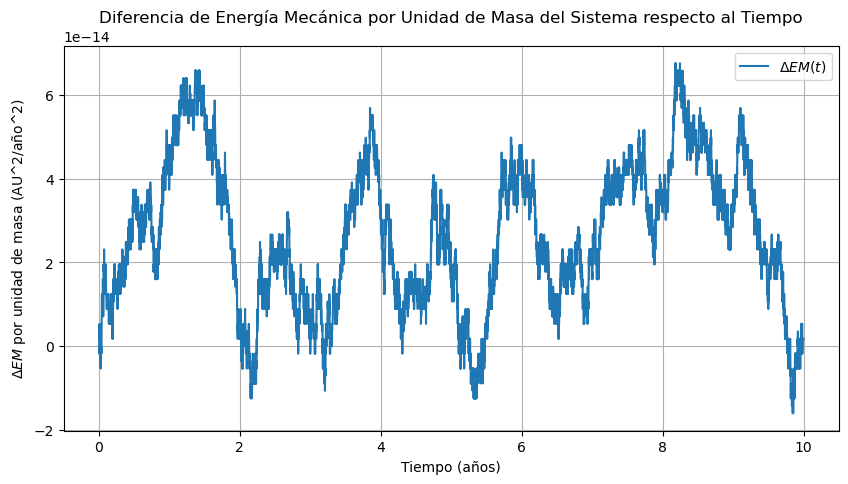

In [35]:
def calcular_EM(u, gm):
    # Extraer componentes de velocidad y posición
    x1, y1, vx1, vy1, x2, y2, vx2, vy2 = u.T
    r1 = np.sqrt(x1**2 + y1**2)
    r2 = np.sqrt(x2**2 + y2**2)
    
    # Calcular energía cinética y potencial por unidad de masa para cada planeta
    K1 = 0.5 * (vx1**2 + vy1**2)
    U1 = -gm / r1
    K2 = 0.5 * (vx2**2 + vy2**2)
    U2 = -gm / r2
    
    # Energía mecánica por unidad de masa del sistema
    EM = K1 + U1 + K2 + U2
    
    return EM

EM = calcular_EM(u, gm)
EM0 = EM[0]
Delta_EM = EM - EM0

plt.figure(figsize=(10, 5))
plt.plot(t, Delta_EM, label='$\Delta EM(t)$')
plt.xlabel('Tiempo (años)')
plt.ylabel('$\Delta EM$ por unidad de masa (AU^2/año^2)')
plt.title('Diferencia de Energía Mecánica por Unidad de Masa del Sistema respecto al Tiempo')
plt.legend()
plt.grid(True)
plt.show()


Este código calcula la energía mecánica total por unidad de masa del sistema en cada punto de tiempo y grafica la diferencia respecto al valor inicial. Si la energía se conserva perfectamente, ΔEM debería ser cero o muy cercano a cero durante toda la simulación, permitiendo pequeñas variaciones debidas a errores numéricos de la integración. La escala del gráfico se ajustará automáticamente para reflejar las variaciones en ΔEM.

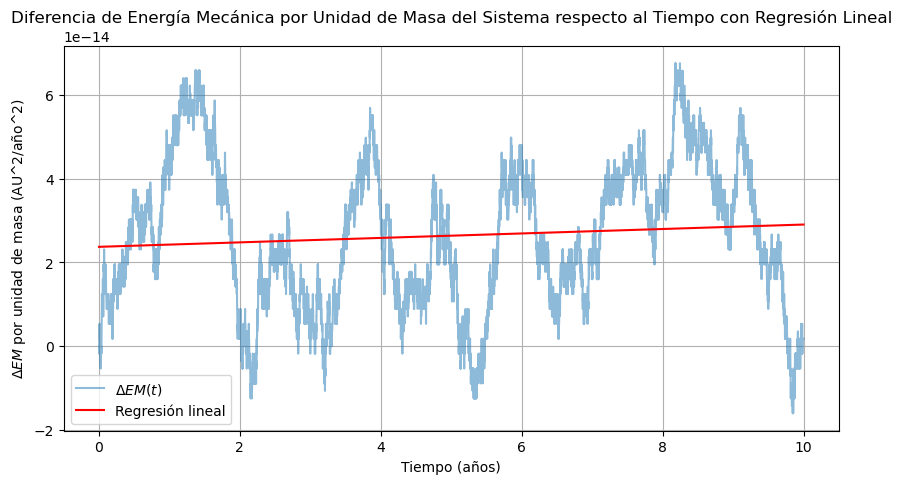

In [36]:
pendiente, ordenada_al_origen = np.polyfit(t, Delta_EM, 1)
Delta_EM_regresion = pendiente * t + ordenada_al_origen

plt.figure(figsize=(10, 5))
plt.plot(t, Delta_EM, label='$\Delta EM(t)$', alpha=0.5)  # Datos originales
plt.plot(t, Delta_EM_regresion, 'r-', label='Regresión lineal')  # Línea de regresión
plt.xlabel('Tiempo (años)')
plt.ylabel('$\Delta EM$ por unidad de masa (AU^2/año^2)')
plt.title('Diferencia de Energía Mecánica por Unidad de Masa del Sistema respecto al Tiempo con Regresión Lineal')
plt.legend()
plt.grid(True)
plt.show()


La presencia de una pendiente distinta de cero en la línea de regresión indicaría una tendencia en la variación de la energía mecánica por unidad de masa a lo largo del tiempo, sugiriendo que la energía no se conserva perfectamente en la simulación. Esto podría deberse a errores numéricos inherentes al método de integración o a simplificaciones en el modelo físico.